In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from time import sleep
import matplotlib.pyplot as plt

In [2]:
import numpy as np


In [2]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [3]:
from scipy.stats import uniform
t = np.linspace(-50,50,500)
X = uniform.rvs(size=1000)
ecf = np.mean(np.exp(1j * np.outer(X, t).astype(float)), axis=0)
r_part = np.real(ecf)
i_part = np.imag(ecf)

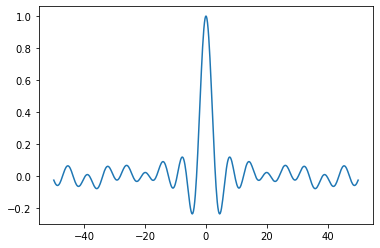

In [4]:
fig, ax = plt.subplots()
ax.plot(t, r_part.T)

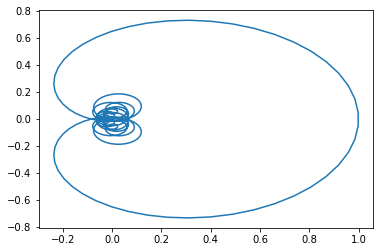

In [5]:
fig, ax = plt.subplots()
ax.plot(r_part.T, i_part.T)

In [6]:
# set configuration
sample_size = 50
nr_sample = 50
num_steps = 50
max_t = 10
t = np.linspace(max_t/num_steps, max_t, num_steps)
sample_config = [sample_size, nr_sample]

# classificatiom
test_size, cv = 0.5, 5
cv_config = [test_size, cv]

### Bounded distributions

In [7]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)

In [8]:
ecf_df = dem.get_ecf(bounded_samples, t)
ecf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.992428,0.969921,0.933100,0.882977,0.820925,0.748636,0.668069,0.581388,0.490898,0.398976,...,0.296268,0.315256,0.327051,0.331504,0.328735,0.319122,0.303281,0.282036,0.256380,arcsine
1,0.993719,0.975052,0.944516,0.902955,0.851508,0.791578,0.724778,0.652882,0.577767,0.501347,...,0.263850,0.250316,0.232008,0.209470,0.183437,0.154807,0.124599,0.093916,0.063893,arcsine
2,0.993321,0.973461,0.940949,0.896647,0.841726,0.777629,0.706024,0.628760,0.547803,0.465185,...,0.174518,0.188727,0.198525,0.203861,0.204882,0.201912,0.195433,0.186066,0.174529,arcsine


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

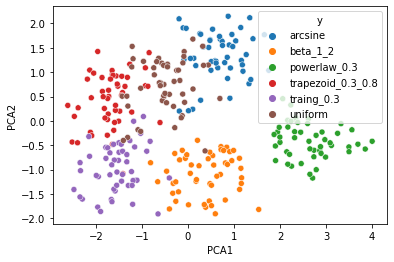

In [18]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

pca = PCA(n_components=5)
x_pca = pca.fit_transform(ecf_df.iloc[:,:-1])

pca_res = pd.DataFrame(x_pca)
pca_res.columns=['PCA1','PCA2','PCA3','PCA4','PCA5']
pca_res['y']=ecf_df['label']

sns.scatterplot(data=pca_res,x='PCA1',y='PCA2',hue='y')

<AxesSubplot:xlabel='PCA4', ylabel='PCA2'>

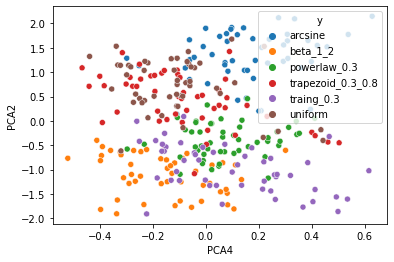

In [26]:
sns.scatterplot(data=pca_res,x='PCA4',y='PCA2',hue='y')

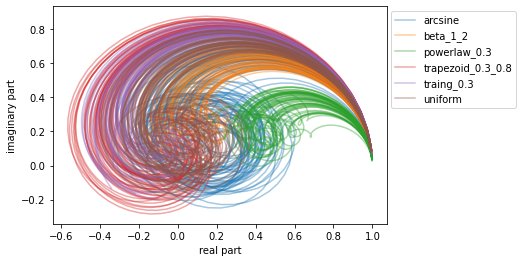

In [9]:
dem.get_ecf_plot(ecf_df,t)

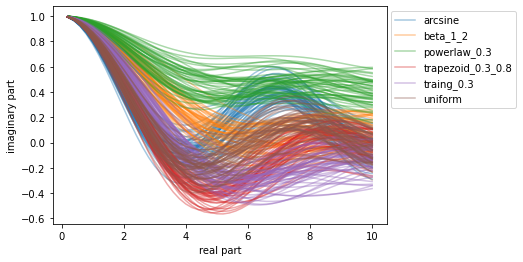

In [16]:
get_ecf_plot2(ecf_df, t)

In [15]:
def get_default_plt_colors():
    return plt.rcParams['axes.prop_cycle'].by_key()['color']

def get_ecf_plot2(df, t):
    names = df.iloc[:,-1].unique()
    fig, ax = plt.subplots()
    colors = get_default_plt_colors()
    handles = []
    for name, color in zip(names, colors):  # iterate over each distribution
        r_part = df.loc[df.iloc[:,-1] == name].iloc[:,0:len(t)]
        hh = ax.plot(t, r_part.T, c=color, alpha=0.4, label=name)
        handles.append(hh[0] if isinstance(hh, list) else hh)
    ax.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.xlabel('real part')
    plt.ylabel('imaginary part')

### SVM

In [76]:
sample_size_list = [5, 10, 25, 50, 100, 500, 1000]
num_steps_list = np.arange(1,52,2)
max_t_list = [50, 100, 150, 200, 250, 500]

In [77]:
res_svm = cm.cv_ecf(sample_size_list, max_t_list, num_steps_list, bounded_dists, sample_config, cv_config, 1)

  0%|          | 0/7 [00:00<?, ?it/s]

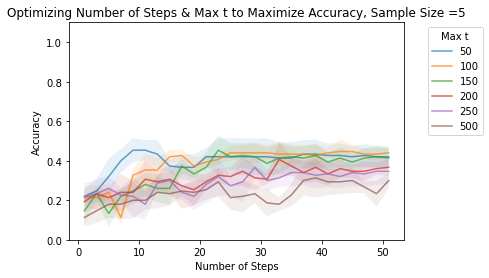

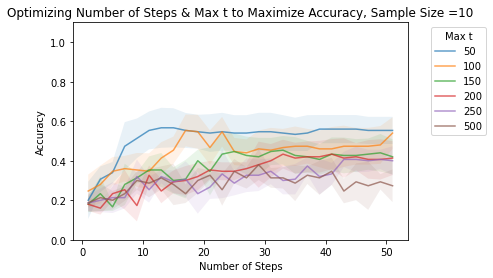

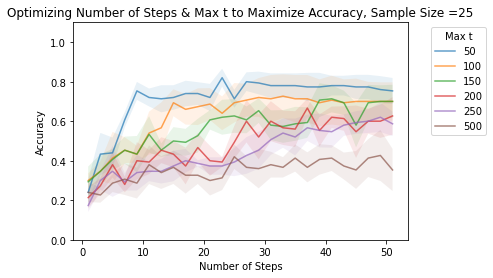

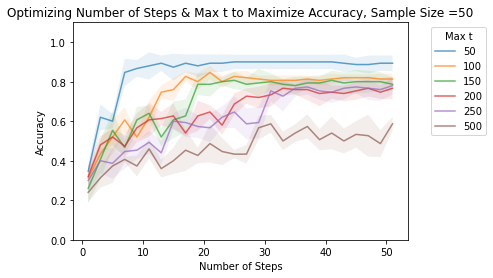

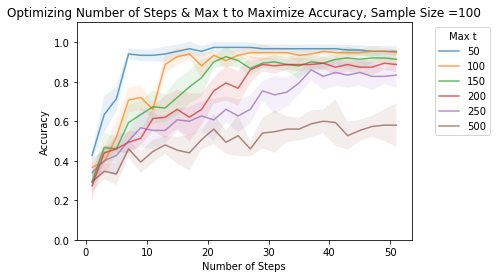

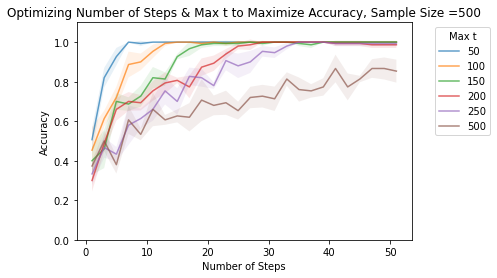

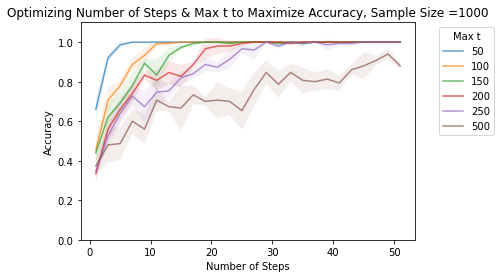

In [89]:
cm.plot_cv_ecf(res_svm)

### Logistic Regression

In [79]:
res_lr = cm.cv_ecf(sample_size_list, max_t_list, num_steps_list, bounded_dists, sample_config, cv_config, 2)

  0%|          | 0/7 [00:00<?, ?it/s]

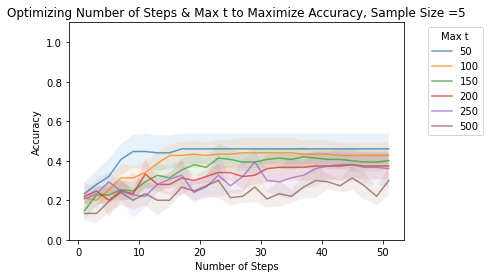

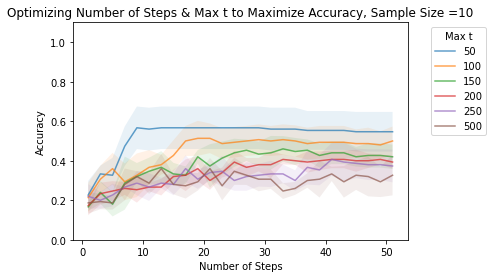

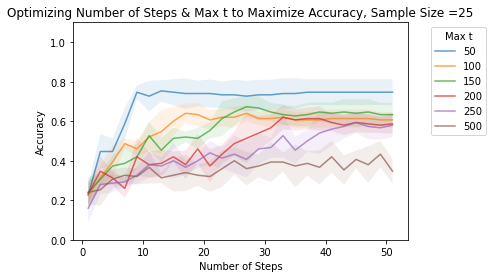

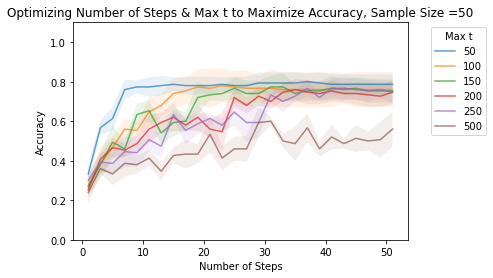

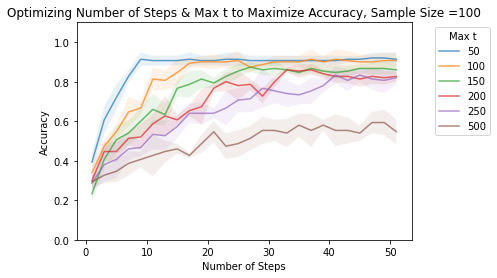

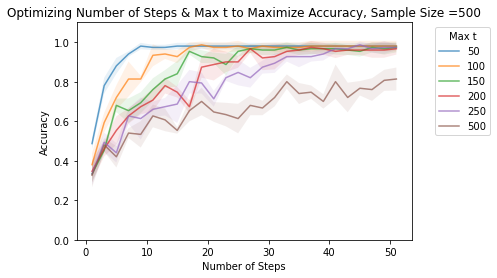

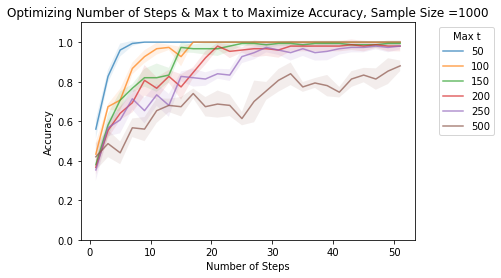

In [90]:
cm.plot_cv_ecf(res_lr)

### Heavytail distributions

In [81]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size, transform = True)

In [82]:
ecf_df = dem.get_ecf(heavytail_samples, t)
ecf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,0.918403,0.708448,0.452097,0.228853,0.077137,-0.008526,-0.051869,-0.069093,-0.063764,-0.038730,...,0.133799,0.131853,0.113809,0.086476,0.071802,0.087668,0.127016,0.157847,0.148183,cauchy
1,0.891165,0.678650,0.527944,0.430541,0.293911,0.141000,0.060529,0.036117,-0.023746,-0.130500,...,-0.103672,-0.115173,-0.063869,-0.016303,-0.045206,-0.099214,-0.065235,0.041365,0.090240,cauchy
2,0.919417,0.726567,0.515895,0.340727,0.199370,0.086561,0.015990,-0.013874,-0.036711,-0.074054,...,0.123060,0.138119,0.170744,0.190667,0.187993,0.188383,0.206573,0.218315,0.201399,cauchy


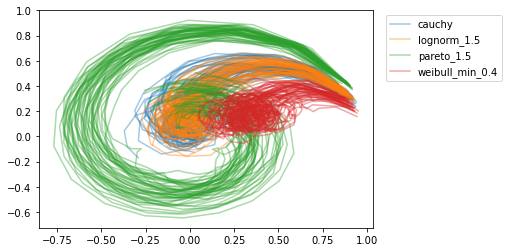

In [38]:
dem.get_ecf_plot(ecf_df, t)

### SVM

In [84]:
res_svm_ht = cm.cv_ecf(sample_size_list, max_t_list, num_steps_list, heavytail_dists, sample_config, cv_config, 1, transform = True)

  0%|          | 0/7 [00:00<?, ?it/s]

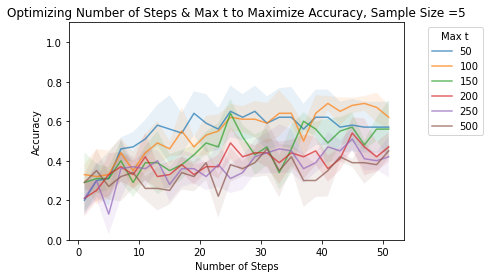

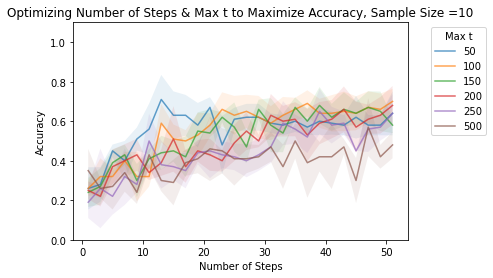

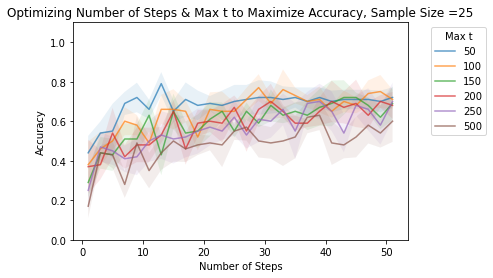

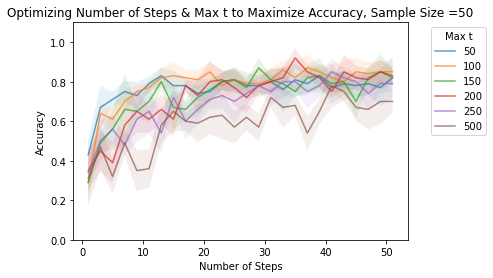

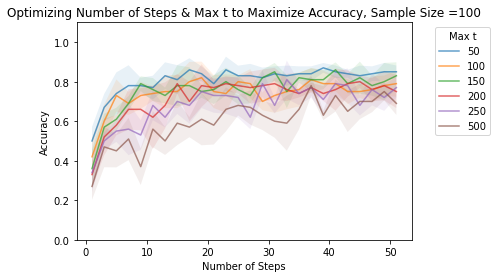

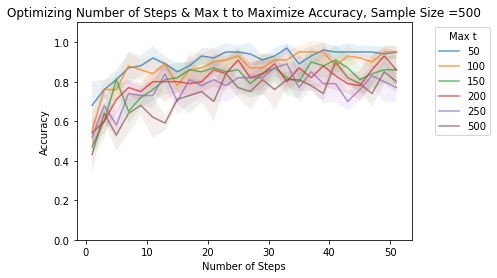

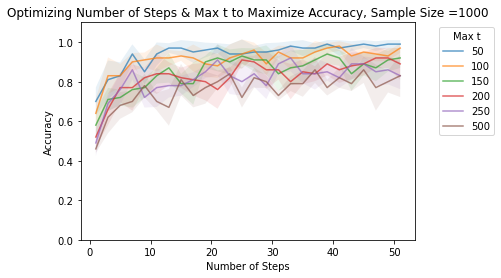

In [91]:
cm.plot_cv_ecf(res_svm_ht)

### Logistic Regression

In [86]:
res_lr_ht = cm.cv_ecf(sample_size_list, max_t_list, num_steps_list, heavytail_dists, sample_config, cv_config, 2, transform=True)

  0%|          | 0/7 [00:00<?, ?it/s]

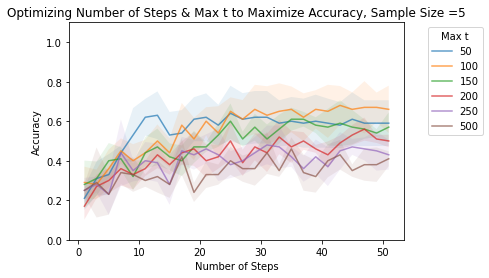

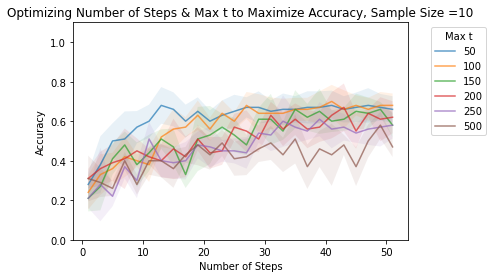

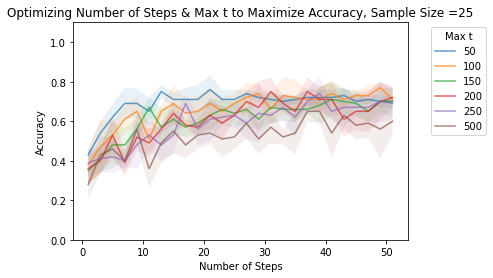

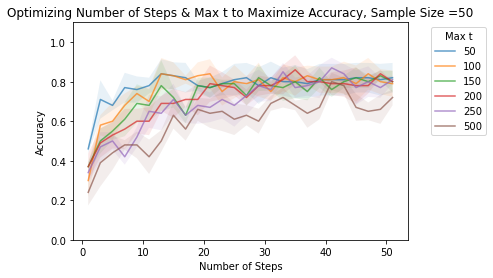

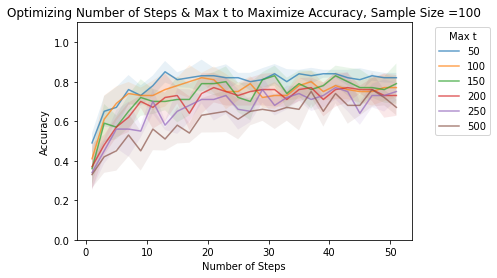

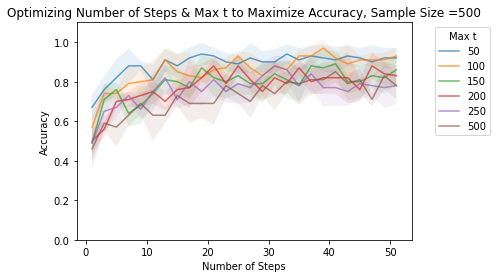

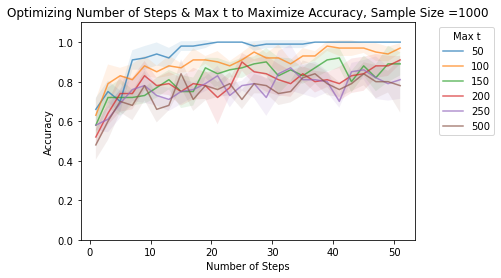

In [92]:
cm.plot_cv_ecf(res_lr_ht)